In [1]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images , train_labels) , (test_images , test_labesls) = datasets.cifar10.load_data()

#Normalize pixels values to be between 0 to 1
train_images , test_images = train_images/225.0 , test_images/225.0

class_name = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08888888888888889..1.1333333333333333].


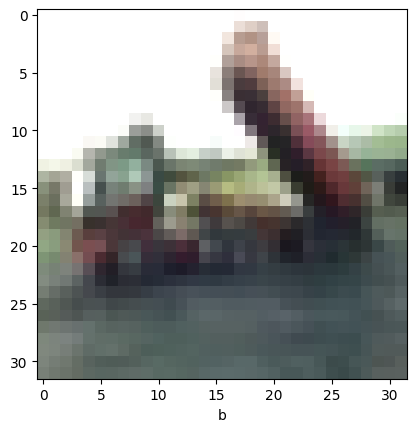

In [3]:
# look at one image 
img_index = 2

plt.imshow(train_images[img_index] , cmap=plt.cm.binary)
plt.xlabel(class_name[img_index][0])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3 , 3) , activation='relu' , input_shape = (32 , 32 , 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3 , 3) , activation='relu')) # These layers will figure out what the image is based on the input layer
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 , (3 , 3) , activation='relu'))

C:\Users\SOBHAN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64 , activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images , train_labels , epochs = 10,
                    validation_data = (test_images , test_labesls))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.3409 - loss: 1.7691 - val_accuracy: 0.5409 - val_loss: 1.3045
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 20ms/step - accuracy: 0.5696 - loss: 1.2107 - val_accuracy: 0.5881 - val_loss: 1.1804
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6379 - loss: 1.0280 - val_accuracy: 0.6588 - val_loss: 0.9857
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.6786 - loss: 0.9176 - val_accuracy: 0.6753 - val_loss: 0.9439
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7070 - loss: 0.8390 - val_accuracy: 0.6823 - val_loss: 0.9117
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.7285 - loss: 0.7832 - val_accuracy: 0.6996 - val_loss: 0.8780
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7448 - loss: 0.7348 - val_accuracy: 0.6908 - val_loss: 0.9047
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7595 -

In [9]:
test_loss , test_acc = model.evaluate(test_images , test_labesls  ,verbose=1)  
print(test_acc*100 , "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7180 - loss: 0.8395
71.4900016784668 %


In [10]:
test_images.shape

(10000, 32, 32, 3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.017777777777777778..1.04].


[-1.3941597 -3.9862902 -1.7823324  3.9568872 -1.5119674  3.4251482
 -1.3921916 -1.2886813 -1.3700345 -5.291343 ]
3
cat


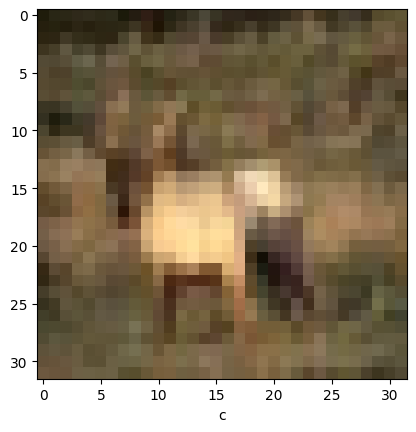

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.035555555555555556..1.12].


[  5.3745604   5.797431   -7.424386   -5.6510606  -5.9286175 -10.499856
  -9.612988   -9.465054    9.27008     2.7341282]
8
ship


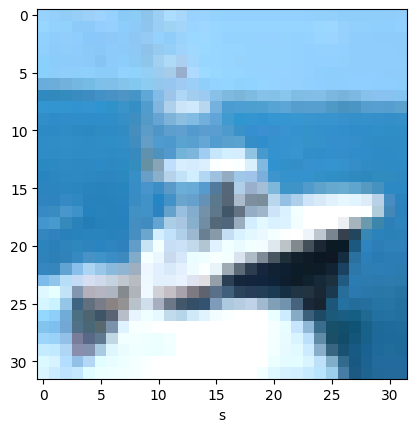

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.035555555555555556..1.12].


[ 3.0031378   0.03905995 -2.862248   -1.4978828  -2.4889038  -3.0342152
 -5.0119143  -2.7536674   3.5118008   0.3664432 ]
8
ship


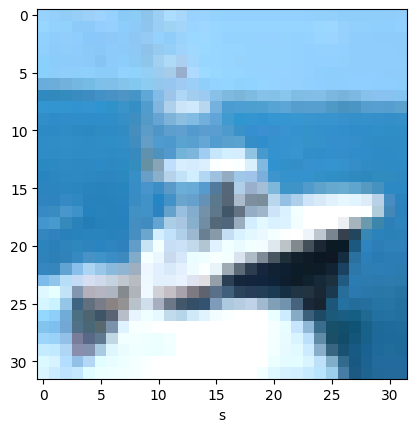

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1333333333333333].


[ 3.7941382  -1.4614365  -0.5078327  -1.5728511  -2.2882595  -5.758008
 -4.151328   -3.0161939  -0.23446625 -3.4156218 ]
0
airplane


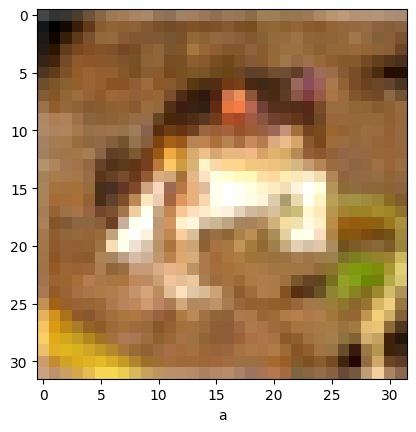

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1288888888888888].


[-5.851736  -4.1949005  2.6101468  3.0529058  5.8807654  0.6336324
  5.0888495 -5.730282  -4.682004  -6.162388 ]
4
deer


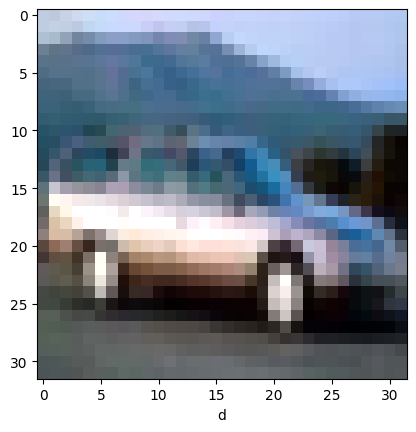

In [11]:
pridiction = model.predict(test_images)  # we use array beacuse the model is used to seeing an array of images to predict
# so whenever you need to predict only one image use an array
i = 0 
while i<5:
 print(pridiction[i])  # so this gives us an array of number 
 print(np.argmax(pridiction[i])) # this will return us the highest number in the array
 print(class_name[np.argmax(pridiction[i])])

 index  = np.argmax(pridiction[i])
 plt.imshow(train_images[index] , cmap=plt.cm.binary)
 plt.xlabel(class_name[index][0])
 plt.show()
 i = i+1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.17525893..1.0030706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.17144124..1.0068161].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1571149..1.0005265].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.16179334..1.0028703].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.17782566..1.002375].


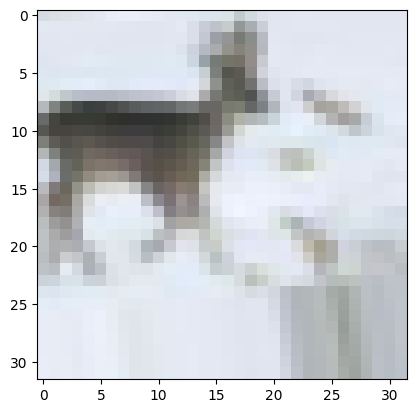

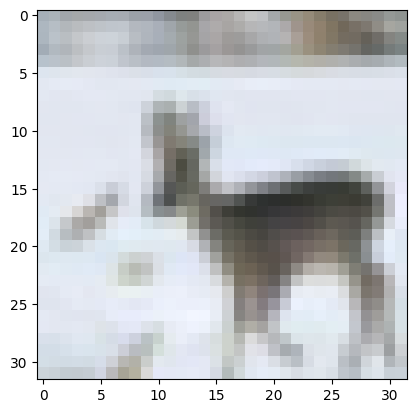

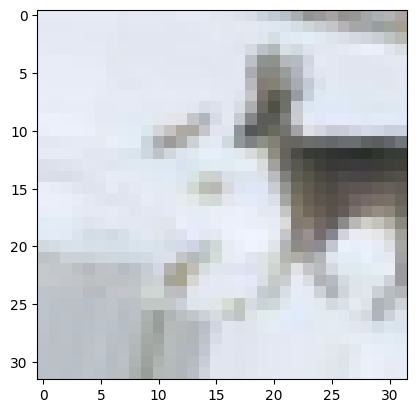

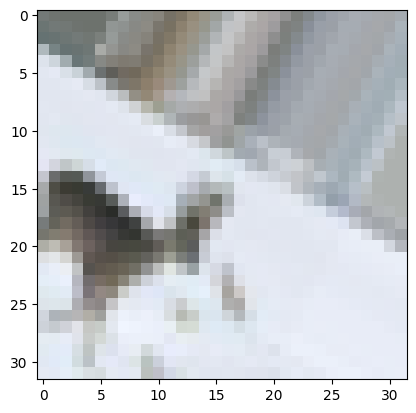

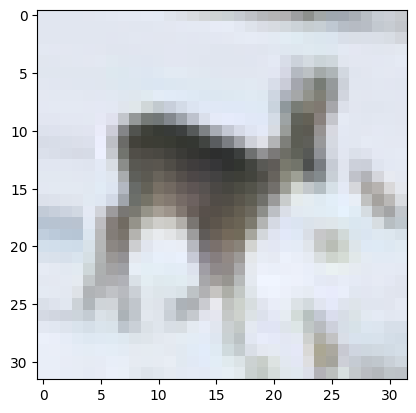

In [12]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


test_img = train_images[20] # picking one image
img = image.img_to_array(test_img) # converts image into a numpy array
img = img.reshape((1,) + img.shape) # well reshapes the images

i = 0

for batch in datagen.flow(img , save_prefix='test' , save_format='jpeg'): # this loop will run forever untill we break the loop , saving imgs to current dictionary
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0])) # this will convert one image into array of same images just in different orientation
    i += 1
    if i > 4: # so there will be 4 image orientation
        break

plt.show()